In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import os 
#from google.colab import files
from PIL import  Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, MaxPooling2D, AveragePooling2D,
                              Flatten, BatchNormalization, Dropout)
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils
from tensorflow.keras.datasets import cifar100

#%matplotlib inline

In [3]:
# Загружаеим датасет cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 6s 0us/step


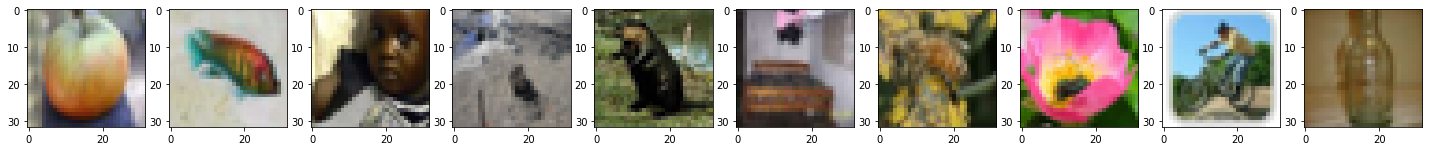

In [4]:
# Выводим выборочно 10 картинкок
fig, ax = plt.subplots(1, 10, figsize=(25, 3))
for i in range(10):
    label_index = np.where(y_train ==i)[0]
    index = random.choice(label_index)
    img = X_train[index]
    ax[i].imshow(Image.fromarray(img))

plt.show()

In [5]:
# преобразуем y_train и y_test в формат One Hot Encoding
y_train = utils.to_categorical(y_train, 100)
y_test = utils.to_categorical(y_test, 100)

In [6]:
#  Cмотрим размеры выборок
print(f'Размерность X_train: {X_train.shape}, \nРазмерность X_test: {X_test.shape}'+ 
f'\nРазмерность y_train {y_train.shape}, \nРазмерность y_test: {y_test.shape}')

Размерность X_train: (50000, 32, 32, 3), 
Размерность X_test: (10000, 32, 32, 3)
Размерность y_train (50000, 100), 
Размерность y_test: (10000, 100)


Создаем сеть VAR. 1

In [7]:
model = Sequential([
                    BatchNormalization(input_shape=(32, 32, 3)),
                    Conv2D(32, (3, 3), padding='same', activation='relu'),
                    Conv2D(32, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.3),
                    Conv2D(64, (3, 3), padding='same', activation='relu'),
                    Conv2D(64, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.25),
                    Conv2D(32, (3, 3), padding='same', activation='relu'),
                    Conv2D(32, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.2),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dropout(0.2),
                    Dense(100, activation='softmax')
                    ])


In [8]:
# Компилирум модель
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [9]:
# Обучаем сеть
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
391/391 [==============================] - 42s 30ms/step - loss: 4.3999 - accuracy: 0.0344 - val_loss: 3.7706 - val_accuracy: 0.1245
Epoch 2/20
391/391 [==============================] - 11s 27ms/step - loss: 3.7050 - accuracy: 0.1280 - val_loss: 3.3144 - val_accuracy: 0.2020
Epoch 3/20
391/391 [==============================] - 11s 27ms/step - loss: 3.3543 - accuracy: 0.1895 - val_loss: 3.0501 - val_accuracy: 0.2563
Epoch 4/20
391/391 [==============================] - 11s 27ms/step - loss: 3.1307 - accuracy: 0.2304 - val_loss: 2.9263 - val_accuracy: 0.2768
Epoch 5/20
391/391 [==============================] - 11s 27ms/step - loss: 2.9455 - accuracy: 0.2652 - val_loss: 2.7282 - val_accuracy: 0.3111
Epoch 6/20
391/391 [==============================] - 11s 27ms/step - loss: 2.8175 - accuracy: 0.2880 - val_loss: 2.6033 - val_accuracy: 0.3345
Epoch 7/20
391/391 [==============================] - 11s 27ms/step - loss: 2.7070 - accuracy: 0.3080 - val_loss: 2.5609 - val_accuracy:

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3

In [11]:
# точность модели
accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 2.0546 - accuracy: 0.4551


In [12]:
# максимальная точность  и минимальная ошибка на обучающей и проверочной выборе
print(f'Максимальная точность обучающей выборки: {max(history.history["accuracy"])} \
\nМинимальная ошибка на обучающей выборе: {min(history.history["loss"])} \
\nМаксимальная точность проверочной выборки: {max(history.history["val_accuracy"])} \
\nМинимальная ошибка на проверочной выборе: {min(history.history["val_loss"])}')

Максимальная точность обучающей выборки: 0.42419999837875366 
Минимальная ошибка на обучающей выборе: 2.127041816711426 
Максимальная точность проверочной выборки: 0.45509999990463257 
Минимальная ошибка на проверочной выборе: 2.0545566082000732


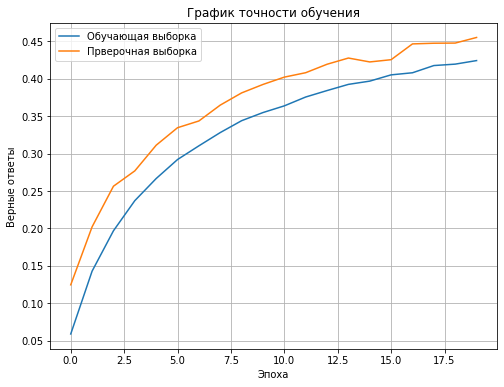

In [13]:
# График точности обучения
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Обучающая выборка')
plt.plot(history.history['val_accuracy'], label='Прверочная выборка')
plt.xlabel('Эпоха')
plt.ylabel('Верные ответы')
plt.title('График точности обучения')
plt.grid()
plt.legend()
plt.show()

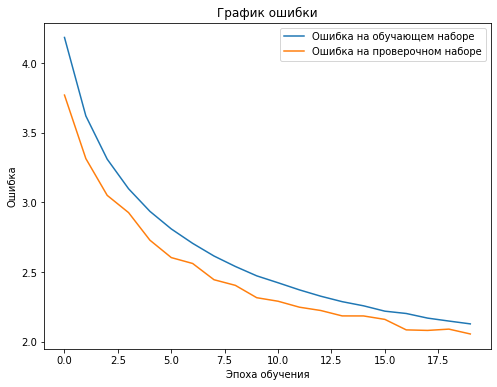

In [14]:
# Выводим графики ошибки
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.title('График ошибки')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Тестируем сеть Var 2.

In [15]:
model_2 = Sequential([
                    BatchNormalization(input_shape=(32, 32, 3)),
                    Conv2D(32, (3, 3), padding='same', activation='relu'),
                    Conv2D(32, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.3),
                    Conv2D(64, (3, 3), padding='same', activation='relu'),
                    Conv2D(64, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.25),
                    Conv2D(32, (3, 3), padding='same', activation='relu'),
                    Conv2D(32, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.2),
                    Flatten(),
                    Dense(256, activation='relu'),
                    Dropout(0.2),
                    Dense(100, activation='softmax')
                    ])

In [16]:
# Компилирум модель
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [17]:
# Обучаем сеть. Увеличиваем количество эпох до 50
history_2 = model_2.fit(X_train, y_train, batch_size=768, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
66/66 [==============================] - 11s 122ms/step - loss: 4.5398 - accuracy: 0.0169 - val_loss: 4.5180 - val_accuracy: 0.0487
Epoch 2/100
66/66 [==============================] - 8s 118ms/step - loss: 4.0219 - accuracy: 0.0780 - val_loss: 3.8830 - val_accuracy: 0.1228
Epoch 3/100
66/66 [==============================] - 8s 118ms/step - loss: 3.7328 - accuracy: 0.1249 - val_loss: 3.5511 - val_accuracy: 0.1707
Epoch 4/100
66/66 [==============================] - 8s 118ms/step - loss: 3.5108 - accuracy: 0.1628 - val_loss: 3.2700 - val_accuracy: 0.2184
Epoch 5/100
66/66 [==============================] - 8s 118ms/step - loss: 3.2928 - accuracy: 0.1985 - val_loss: 3.1174 - val_accuracy: 0.2497
Epoch 6/100
66/66 [==============================] - 8s 119ms/step - loss: 3.1595 - accuracy: 0.2259 - val_loss: 2.9487 - val_accuracy: 0.2827
Epoch 7/100
66/66 [==============================] - 8s 118ms/step - loss: 3.0214 - accuracy: 0.2515 - val_loss: 2.9530 - val_accuracy: 0.278

In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)       

In [19]:
# точность модели
accuracy = model_2.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.9053 - accuracy: 0.5001


In [20]:
# максимальная точность  и минимальная ошибка на обучающей и проверочной выборе
print(f'Максимальная точность обучающей выборки: {max(history_2.history["accuracy"])} \
\nМинимальная ошибка на обучающей выборе: {min(history_2.history["loss"])} \
\nМаксимальная точность проверочной выборки: {max(history_2.history["val_accuracy"])} \
\nМинимальная ошибка на проверочной выборе: {min(history_2.history["val_loss"])}')

Максимальная точность обучающей выборки: 0.592199981212616 
Минимальная ошибка на обучающей выборе: 1.394049882888794 
Максимальная точность проверочной выборки: 0.5099999904632568 
Минимальная ошибка на проверочной выборе: 1.868674397468567


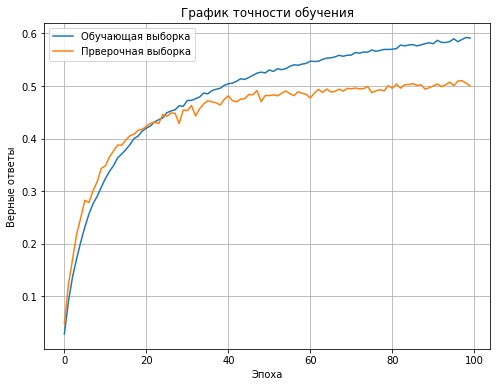

In [21]:
# График точности обучения
plt.figure(figsize=(8, 6))
plt.plot(history_2.history['accuracy'], label='Обучающая выборка')
plt.plot(history_2.history['val_accuracy'], label='Прверочная выборка')
plt.xlabel('Эпоха')
plt.ylabel('Верные ответы')
plt.title('График точности обучения')
plt.grid()
plt.legend()
plt.show()

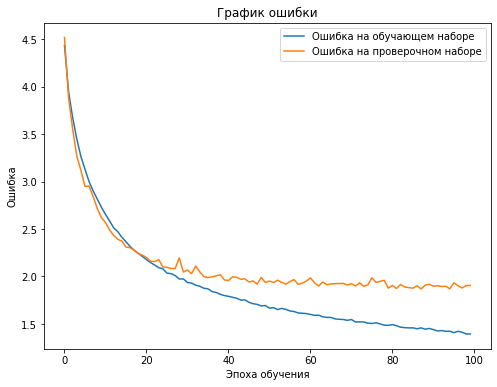

In [22]:
# Выводим графики ошибки
plt.figure(figsize=(8, 6))
plt.plot(history_2.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history_2.history['val_loss'], label='Ошибка на проверочном наборе')
plt.title('График ошибки')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Тестируем сеть Var. 3

In [23]:
model_3 = Sequential([
                    BatchNormalization(input_shape=(32, 32, 3)),
                    Conv2D(32, (3, 3), padding='same', activation='relu'), #input_shape=(32, 32, 3)),
                    Conv2D(32, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.5),
                    Conv2D(256, (3, 3), padding='same', activation='relu'),
                    Conv2D(256, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.3),
                    Conv2D(128, (3, 3), padding='same', activation='relu'),
                    Conv2D(128, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.25),
                    Conv2D(64, (3, 3), padding='same', activation='relu'),
                    Conv2D(64, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.25),
                    Conv2D(32, (3, 3), padding='same', activation='relu'),
                    Conv2D(32, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.2),
                    Flatten(),
                    Dense(32, activation='relu'),
                    Dropout(0.2),
                    Dense(100, activation='softmax')
                    ])

In [24]:
# Компилирум модель
model_3.compile(loss='categorical_crossentropy', optimizer=Adam(0.0005), metrics='accuracy')

In [25]:
history_3 = model_3.fit(X_train, y_train, batch_size=256, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
196/196 [==============================] - 28s 125ms/step - loss: 4.5939 - accuracy: 0.0115 - val_loss: 4.4875 - val_accuracy: 0.0198
Epoch 2/50
196/196 [==============================] - 23s 117ms/step - loss: 4.4896 - accuracy: 0.0205 - val_loss: 4.3803 - val_accuracy: 0.0234
Epoch 3/50
196/196 [==============================] - 23s 116ms/step - loss: 4.3635 - accuracy: 0.0232 - val_loss: 4.2666 - val_accuracy: 0.0335
Epoch 4/50
196/196 [==============================] - 23s 117ms/step - loss: 4.2647 - accuracy: 0.0329 - val_loss: 4.1856 - val_accuracy: 0.0578
Epoch 5/50
196/196 [==============================] - 23s 116ms/step - loss: 4.1655 - accuracy: 0.0454 - val_loss: 4.0534 - val_accuracy: 0.0699
Epoch 6/50
196/196 [==============================] - 23s 116ms/step - loss: 4.0468 - accuracy: 0.0547 - val_loss: 3.9051 - val_accuracy: 0.0846
Epoch 7/50
196/196 [==============================] - 23s 116ms/step - loss: 3.9101 - accuracy: 0.0711 - val_loss: 3.7465 - val_ac

In [26]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 256)       73984     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 256)      

In [27]:
# точность модели
accuracy = model_3.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 2.2720 - accuracy: 0.4204


In [28]:
# максимальная точность  и минимальная ошибка на обучающей и проверочной выборе
print(f'Максимальная точность обучающей выборки: {max(history_3.history["accuracy"])} \
\nМинимальная ошибка на обучающей выборе: {min(history_3.history["loss"])} \
\nМаксимальная точность проверочной выборки: {max(history_3.history["val_accuracy"])} \
\nМинимальная ошибка на проверочной выборе: {min(history_3.history["val_loss"])}')

Максимальная точность обучающей выборки: 0.42006000876426697 
Минимальная ошибка на обучающей выборе: 2.083535671234131 
Максимальная точность проверочной выборки: 0.42500001192092896 
Минимальная ошибка на проверочной выборе: 2.2054049968719482


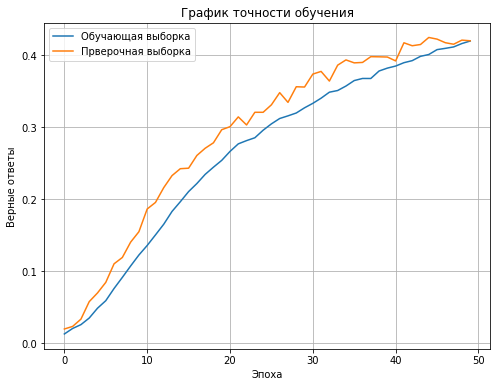

In [29]:
# График точности обучения
plt.figure(figsize=(8, 6))
plt.plot(history_3.history['accuracy'], label='Обучающая выборка')
plt.plot(history_3.history['val_accuracy'], label='Прверочная выборка')
plt.xlabel('Эпоха')
plt.ylabel('Верные ответы')
plt.title('График точности обучения')
plt.grid()
plt.legend()
plt.show()

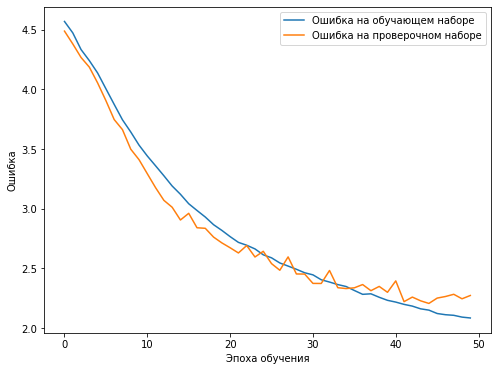

In [30]:
# Выводим графики ошибки
plt.figure(figsize=(8, 6))
plt.plot(history_3.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history_3.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Тестируем сеть Var. 4

In [31]:
model_4 = Sequential([
                    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
                    Conv2D(32, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.5),
                    Conv2D(64, (3, 3), padding='same', activation='relu'),
                    Conv2D(64, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.3),
                    Conv2D(256, (3, 3), padding='same', activation='relu'),
                    Conv2D(256, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Conv2D(128, (3, 3), padding='same', activation='relu'),
                    Conv2D(128, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Conv2D(64, (3, 3), padding='same', activation='relu'),
                    Conv2D(64, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.2),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dropout(0.2),
                    Dense(100, activation='softmax')
                    ])

In [32]:
# Компилирум модель
model_4.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.005), metrics='accuracy')

In [33]:
history_4 = model_4.fit(X_train, y_train, batch_size=512, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
98/98 [==============================] - 19s 155ms/step - loss: 7.1473 - accuracy: 0.0090 - val_loss: 4.6053 - val_accuracy: 0.0100
Epoch 2/50
98/98 [==============================] - 12s 123ms/step - loss: 4.6057 - accuracy: 0.0086 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 3/50
98/98 [==============================] - 12s 123ms/step - loss: 4.6056 - accuracy: 0.0095 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 4/50
98/98 [==============================] - 12s 122ms/step - loss: 4.6056 - accuracy: 0.0099 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 5/50
98/98 [==============================] - 12s 122ms/step - loss: 4.6056 - accuracy: 0.0091 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 6/50
98/98 [==============================] - 12s 122ms/step - loss: 4.6056 - accuracy: 0.0095 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 7/50
98/98 [==============================] - 12s 122ms/step - loss: 4.6056 - accuracy: 0.0095 - val_loss: 4.6052 - val_accuracy: 0.0100

In [34]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 64)         

In [35]:
# точность модели
accuracy = model_4.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 4.6052 - accuracy: 0.0100


In [36]:
# максимальная точность  и минимальная ошибка на обучающей и проверочной выборе
print(f'Максимальная точность обучающей выборки: {max(history_4.history["accuracy"])} \
\nМинимальная ошибка на обучающей выборе: {min(history_4.history["loss"])} \
\nМаксимальная точность проверочной выборки: {max(history_4.history["val_accuracy"])} \
\nМинимальная ошибка на проверочной выборе: {min(history_4.history["val_loss"])}')

Максимальная точность обучающей выборки: 0.009600000455975533 
Минимальная ошибка на обучающей выборе: 4.605935096740723 
Максимальная точность проверочной выборки: 0.009999999776482582 
Минимальная ошибка на проверочной выборе: 4.60520076751709


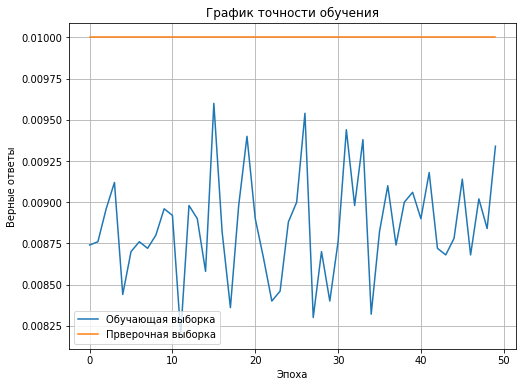

In [37]:
# График точности обучения
plt.figure(figsize=(8, 6))
plt.plot(history_4.history['accuracy'], label='Обучающая выборка')
plt.plot(history_4.history['val_accuracy'], label='Прверочная выборка')
plt.xlabel('Эпоха')
plt.ylabel('Верные ответы')
plt.title('График точности обучения')
plt.grid()
plt.legend()
plt.show()

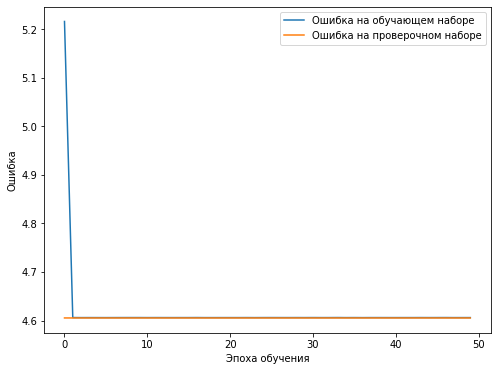

In [38]:
# Выводим графики ошибки
plt.figure(figsize=(8, 6))
plt.plot(history_4.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history_4.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Тестируем сеть Var. 5

In [39]:
model_5 = Sequential([
                    BatchNormalization(input_shape=(32, 32, 3)),
                    Conv2D(32, (5), padding='same', activation='relu'), #input_shape=(32, 32, 3)),
                    Conv2D(32, (5), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.5),
                    Conv2D(64, (5), padding='same', activation='relu'),
                    Conv2D(64, (5), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.3),
                    Conv2D(128, (5), padding='same', activation='relu'),
                    Conv2D(128, (5), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.25),
                    #BatchNormalization(),
                    Conv2D(64, (5), padding='same', activation='relu'),
                    Conv2D(64, (5), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.25),
                    Conv2D(32, (5), padding='same', activation='relu'),
                    Conv2D(32, (5), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.25),
                    Flatten(),
                    Dropout(0.2),
                    Dense(512, activation='relu'),
                    Dropout(0.3),
                    Dense(256),
                    Flatten(),
                    Dropout(0.2),
                    Dense(100, activation='softmax')
                    ])

In [40]:
# Компилирум модель
model_5.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics='accuracy')

In [41]:
history_5 = model_5.fit(X_train, y_train, batch_size=512, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
98/98 [==============================] - 26s 229ms/step - loss: 4.5391 - accuracy: 0.0154 - val_loss: 4.3778 - val_accuracy: 0.0254
Epoch 2/50
98/98 [==============================] - 19s 195ms/step - loss: 4.3397 - accuracy: 0.0236 - val_loss: 4.3173 - val_accuracy: 0.0237
Epoch 3/50
98/98 [==============================] - 19s 195ms/step - loss: 4.2317 - accuracy: 0.0277 - val_loss: 4.1992 - val_accuracy: 0.0320
Epoch 4/50
98/98 [==============================] - 19s 195ms/step - loss: 4.1808 - accuracy: 0.0325 - val_loss: 4.3539 - val_accuracy: 0.0217
Epoch 5/50
98/98 [==============================] - 19s 194ms/step - loss: 4.1576 - accuracy: 0.0322 - val_loss: 4.2010 - val_accuracy: 0.0304
Epoch 6/50
98/98 [==============================] - 19s 195ms/step - loss: 4.1129 - accuracy: 0.0334 - val_loss: 4.2353 - val_accuracy: 0.0263
Epoch 7/50
98/98 [==============================] - 19s 195ms/step - loss: 4.0965 - accuracy: 0.0375 - val_loss: 4.2728 - val_accuracy: 0.0270

In [42]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 64)       

In [43]:
# точность модели
accuracy = model_5.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 2.8152 - accuracy: 0.3011


In [44]:
# максимальная точность  и минимальная ошибка на обучающей и проверочной выборе
print(f'Максимальная точность обучающей выборки: {max(history_5.history["accuracy"])} \
\nМинимальная ошибка на обучающей выборе: {min(history_5.history["loss"])} \
\nМаксимальная точность проверочной выборки: {max(history_5.history["val_accuracy"])} \
\nМинимальная ошибка на проверочной выборе: {min(history_5.history["val_loss"])}')

Максимальная точность обучающей выборки: 0.32468000054359436 
Минимальная ошибка на обучающей выборе: 2.559648036956787 
Максимальная точность проверочной выборки: 0.3041999936103821 
Минимальная ошибка на проверочной выборе: 2.766544818878174


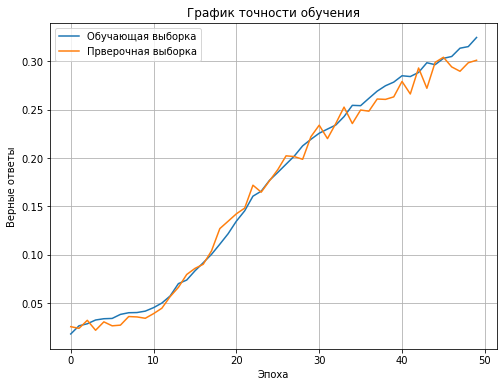

In [45]:
# График точности обучения
plt.figure(figsize=(8, 6))
plt.plot(history_5.history['accuracy'], label='Обучающая выборка')
plt.plot(history_5.history['val_accuracy'], label='Прверочная выборка')
plt.xlabel('Эпоха')
plt.ylabel('Верные ответы')
plt.title('График точности обучения')
plt.grid()
plt.legend()
plt.show()

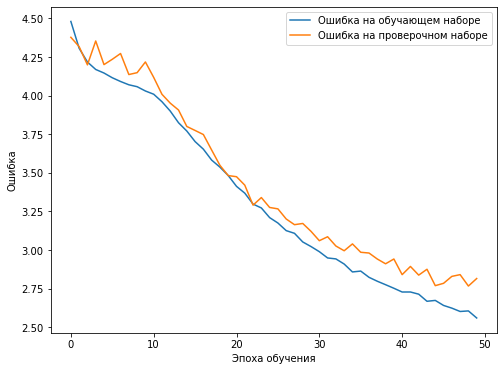

In [46]:
# Выводим графики ошибки
plt.figure(figsize=(8, 6))
plt.plot(history_5.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history_5.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Тестируем сеть Var. 6

In [47]:
model_6 = Sequential([
                    BatchNormalization(input_shape=(32, 32, 3)),
                    Conv2D(32, (3, 3), padding='same', activation='relu'),
                    Conv2D(32, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.25),
                    BatchNormalization(),
                    Conv2D(64, (3, 3), padding='same', activation='relu'),
                    Conv2D(64, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.25),
                    BatchNormalization(),
                    Conv2D(256, (3, 3), padding='same', activation='relu'),
                    Conv2D(256, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.25),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dropout(0.25),
                    Dense(100, activation='softmax')  
                    ])


In [48]:
# Компилирум модель
model_6.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics='accuracy')

In [49]:
history_6 = model_6.fit(X_train, y_train, batch_size=512, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
98/98 [==============================] - 14s 127ms/step - loss: 4.5759 - accuracy: 0.0229 - val_loss: 4.4466 - val_accuracy: 0.0337
Epoch 2/100
98/98 [==============================] - 12s 123ms/step - loss: 4.0412 - accuracy: 0.0834 - val_loss: 4.4460 - val_accuracy: 0.0344
Epoch 3/100
98/98 [==============================] - 12s 123ms/step - loss: 3.7311 - accuracy: 0.1325 - val_loss: 4.2072 - val_accuracy: 0.0645
Epoch 4/100
98/98 [==============================] - 12s 123ms/step - loss: 3.5354 - accuracy: 0.1653 - val_loss: 3.8471 - val_accuracy: 0.1222
Epoch 5/100
98/98 [==============================] - 12s 123ms/step - loss: 3.3803 - accuracy: 0.1938 - val_loss: 3.5660 - val_accuracy: 0.1735
Epoch 6/100
98/98 [==============================] - 12s 123ms/step - loss: 3.2399 - accuracy: 0.2194 - val_loss: 3.2646 - val_accuracy: 0.2245
Epoch 7/100
98/98 [==============================] - 12s 123ms/step - loss: 3.1253 - accuracy: 0.2392 - val_loss: 3.1188 - val_accuracy:

In [50]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 16, 16, 64)       

In [51]:
# точность модели
accuracy = model_6.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 2.2771 - accuracy: 0.5254


In [52]:
# максимальная точность  и минимальная ошибка на обучающей и проверочной выборе
print(f'Максимальная точность обучающей выборки: {max(history_6.history["accuracy"])} \
\nМинимальная ошибка на обучающей выборе: {min(history_6.history["loss"])} \
\nМаксимальная точность проверочной выборки: {max(history_6.history["val_accuracy"])} \
\nМинимальная ошибка на проверочной выборе: {min(history_6.history["val_loss"])}')

Максимальная точность обучающей выборки: 0.8855800032615662 
Минимальная ошибка на обучающей выборе: 0.35351043939590454 
Максимальная точность проверочной выборки: 0.5295000076293945 
Минимальная ошибка на проверочной выборе: 1.9559720754623413


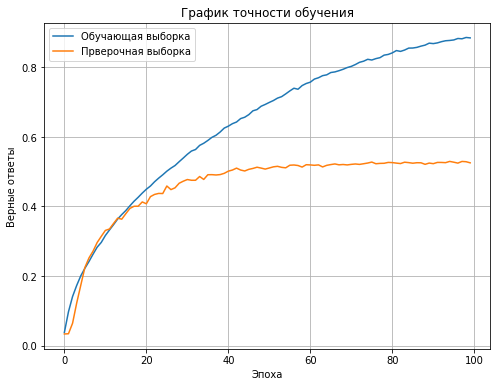

In [53]:
# График точности обучения
plt.figure(figsize=(8, 6))
plt.plot(history_6.history['accuracy'], label='Обучающая выборка')
plt.plot(history_6.history['val_accuracy'], label='Прверочная выборка')
plt.xlabel('Эпоха')
plt.ylabel('Верные ответы')
plt.title('График точности обучения')
plt.grid()
plt.legend()
plt.show()

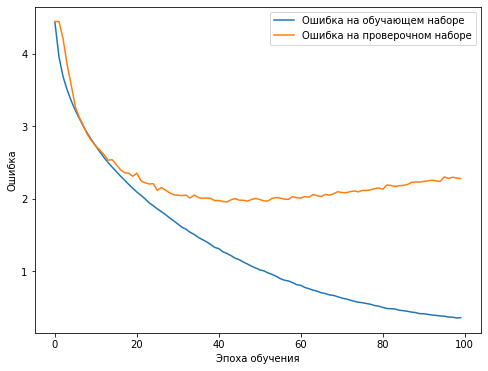

In [54]:
# Выводим графики ошибки
plt.figure(figsize=(8, 6))
plt.plot(history_6.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history_6.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Тестируем сеть Var. 7

In [55]:
  model_7 = Sequential([
        BatchNormalization(input_shape=(32, 32, 3)),
        Conv2D(32, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.5),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.3),
        Dense(512),
        Dropout(0.2),
        Dense(100, activation="softmax")
  ])

In [56]:
model_7.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics='accuracy')

In [57]:
history_7 = model_7.fit(X_train, y_train, batch_size=512, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
98/98 [==============================] - 5s 37ms/step - loss: 4.3882 - accuracy: 0.0599 - val_loss: 3.7376 - val_accuracy: 0.1439
Epoch 2/100
98/98 [==============================] - 3s 31ms/step - loss: 3.5136 - accuracy: 0.1791 - val_loss: 3.3004 - val_accuracy: 0.2348
Epoch 3/100
98/98 [==============================] - 3s 31ms/step - loss: 3.1417 - accuracy: 0.2439 - val_loss: 3.0533 - val_accuracy: 0.2846
Epoch 4/100
98/98 [==============================] - 3s 32ms/step - loss: 2.8887 - accuracy: 0.2952 - val_loss: 2.8184 - val_accuracy: 0.3299
Epoch 5/100
98/98 [==============================] - 3s 31ms/step - loss: 2.7275 - accuracy: 0.3259 - val_loss: 2.7351 - val_accuracy: 0.3443
Epoch 6/100
98/98 [==============================] - 3s 31ms/step - loss: 2.5984 - accuracy: 0.3536 - val_loss: 2.5844 - val_accuracy: 0.3730
Epoch 7/100
98/98 [==============================] - 3s 31ms/step - loss: 2.4962 - accuracy: 0.3721 - val_loss: 2.5671 - val_accuracy: 0.3755
Epoch 

In [58]:
# точность модели
accuracy = model_7.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.2561 - accuracy: 0.4356


In [59]:
# максимальная точность  и минимальная ошибка на обучающей и проверочной выборе
print(f'Максимальная точность обучающей выборки: {max(history_7.history["accuracy"])} \
\nМинимальная ошибка на обучающей выборе: {min(history_7.history["loss"])} \
\nМаксимальная точность проверочной выборки: {max(history_7.history["val_accuracy"])} \
\nМинимальная ошибка на проверочной выборе: {min(history_7.history["val_loss"])}')

Максимальная точность обучающей выборки: 0.5542600154876709 
Минимальная ошибка на обучающей выборе: 1.623724102973938 
Максимальная точность проверочной выборки: 0.44679999351501465 
Минимальная ошибка на проверочной выборе: 2.2020652294158936


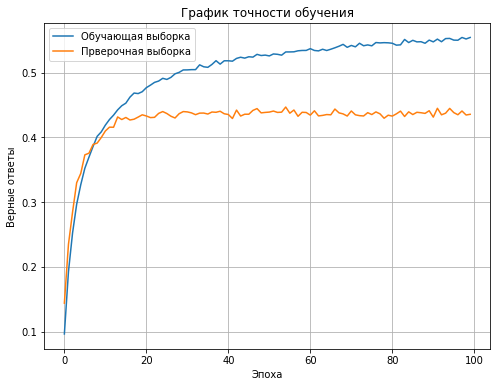

In [60]:
# График точности обучения
plt.figure(figsize=(8, 6))
plt.plot(history_7.history['accuracy'], label='Обучающая выборка')
plt.plot(history_7.history['val_accuracy'], label='Прверочная выборка')
plt.xlabel('Эпоха')
plt.ylabel('Верные ответы')
plt.title('График точности обучения')
plt.grid()
plt.legend()
plt.show()

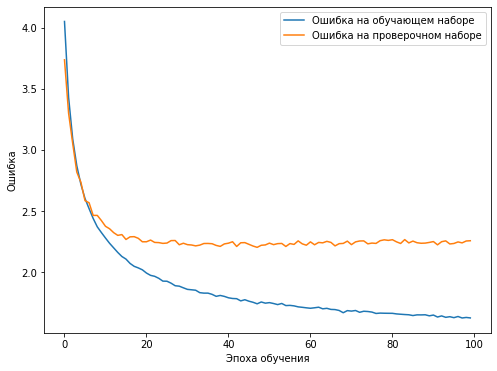

In [61]:
# Выводим графики ошибки
plt.figure(figsize=(8, 6))
plt.plot(history_7.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history_7.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Сравниваем  тестированные варианты

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot()
#plt.bar(np.mean(prediction_inverse))

x = np.arange(3)
height = [prices.mean(), np.mean(prediction_inverse_check), np.mean(prediction_inverse)]
plt.bar(x, height, align='center', linewidth=10)

plt.title('Средние цены на автомобили', fontsize=16)
plt.xticks(x, ['датафрейм', 'тестовая', 'проверочная'])
plt.show()

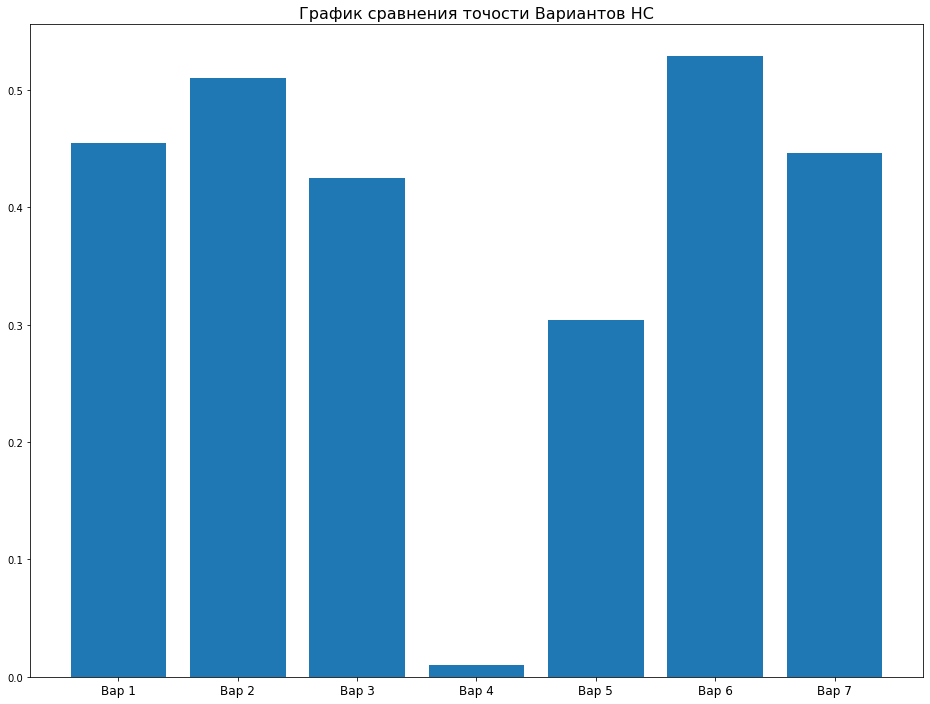

In [73]:
plt.figure(figsize=(16, 12))
#ax, fig = plt.subplot()

x = np.arange(7)

height = [np.max(history.history['val_accuracy']), np.max(history_2.history['val_accuracy']), \
          np.max(history_3.history['val_accuracy']), np.max(history_4.history['val_accuracy']),
          np.max(history_5.history['val_accuracy']), np.max(history_6.history['val_accuracy']),\
          np.max(history_7.history['val_accuracy'])]
plt.bar(x, height, align='center', linewidth=4)

plt.title('График сравнения точости Вариантов НС', fontsize=16)
plt.xticks(x, ['Вар 1', 'Вар 2', 'Вар 3', 'Вар 4', 'Вар 5', 'Вар 6', 'Вар 7'], fontsize=12)
plt.show()

ВЫВОДЫ:
- лучшие результаты достигнуты на VAR. 6 = 52.95% на проверочной выборке; 
- худший на Var. 4 менее 1%; 
- малое количество сверточных слоев , как и чрезмерное их увеличение не дают  высоких показателей точности на проверочной выборке;
- не использование нормализационного слоя на входе и сети приводит к резкому снижению точности;
- Лучшие показатели точности дает варьирование количества нейронов по слоям с постепенным увеличеним;
- снижение количества слоев регуляризации отрицательно влияет на точность, хотя на данном датасете не ведет к переобучению. Изменение значений по слоям не значительно влияет на точность;
- увеличению точности спосбствовало увеличение количество эпох и размера количества батчей;
- изменнение скорости обучения, значительного влияния на данном датасете не оказало;
- Конечно на других датасетах все может работать по другому и оказывать другое влияние.
